In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [66]:
# df = pd.read_csv('./tunisianstockmarket/stocks_market_cap.csv')
df = pd.read_csv('./tunisianstockmarket/ALL_DATA.csv')

In [67]:
df.describe(include='all').T #analysing the nature of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker,187987,88,SFBT,3265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,187987,3236,2016-12-29,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,187965.0,NaN,NaN,NaN,15.343251,31.80462,0.12,3.57,7.2,14.48,602.75
High,187965.0,NaN,NaN,NaN,15.440103,31.935038,0.13,3.6,7.25,14.53,602.75
Low,187960.0,NaN,NaN,NaN,15.241624,31.673683,0.12,3.513823,7.121073,14.39,602.75
Close,187965.0,NaN,NaN,NaN,15.360728,31.821089,0.12,3.575,7.2,14.49,602.75
Volume,187987.0,NaN,NaN,NaN,14543.297792,78244.361712,0.0,430.0,2341.0,9150.0,8264824.0


In [68]:
df.isnull()
df.isnull().values.any()
df.isnull().values.sum()

93

In [69]:
bool_series = pd.isnull(df["Open"])  
df[bool_series]


,Ticker,Date,Open,High,Low,Close,Volume
21123,AST,2016-10-07,NaN,NaN,NaN,NaN,62
21124,AST,2016-10-31,NaN,NaN,NaN,NaN,40
21125,AST,2016-11-01,NaN,NaN,NaN,NaN,8
21126,AST,2016-11-04,NaN,NaN,NaN,NaN,5
21127,AST,2016-11-18,NaN,NaN,NaN,NaN,40
21128,AST,2016-11-24,NaN,NaN,NaN,NaN,37
21129,AST,2016-12-23,NaN,NaN,NaN,NaN,100
21171,AST,2015-03-31,NaN,NaN,NaN,NaN,5
21172,AST,2015-04-14,NaN,NaN,NaN,NaN,295
21173,AST,2015-04-15,NaN,NaN,NaN,NaN,5


In [70]:
df = pd.read_csv('./tunisianstockmarket/data/DH.csv')

In [71]:
df.describe(include='all').T #analysing the nature of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker,1929,1,DH,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1929,1907,2020-01-08,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,1929.0,NaN,NaN,NaN,14.551483,2.110366,10.15,12.91,14.73,16.1,18.73
High,1929.0,NaN,NaN,NaN,14.649959,2.122442,10.16,13.0,14.8,16.4,18.73
Low,1929.0,NaN,NaN,NaN,14.447413,2.11538,10.11,12.82,14.65,16.02,18.7
Close,1929.0,NaN,NaN,NaN,14.571172,2.138122,10.12,12.99,14.7,16.39,18.7
Volume,1929.0,NaN,NaN,NaN,8060.020218,33592.893548,0.0,444.0,1387.0,4670.0,721149.0


In [72]:
df.isnull()
df.isnull().values.any()
# df.isnull().values.sum()

False

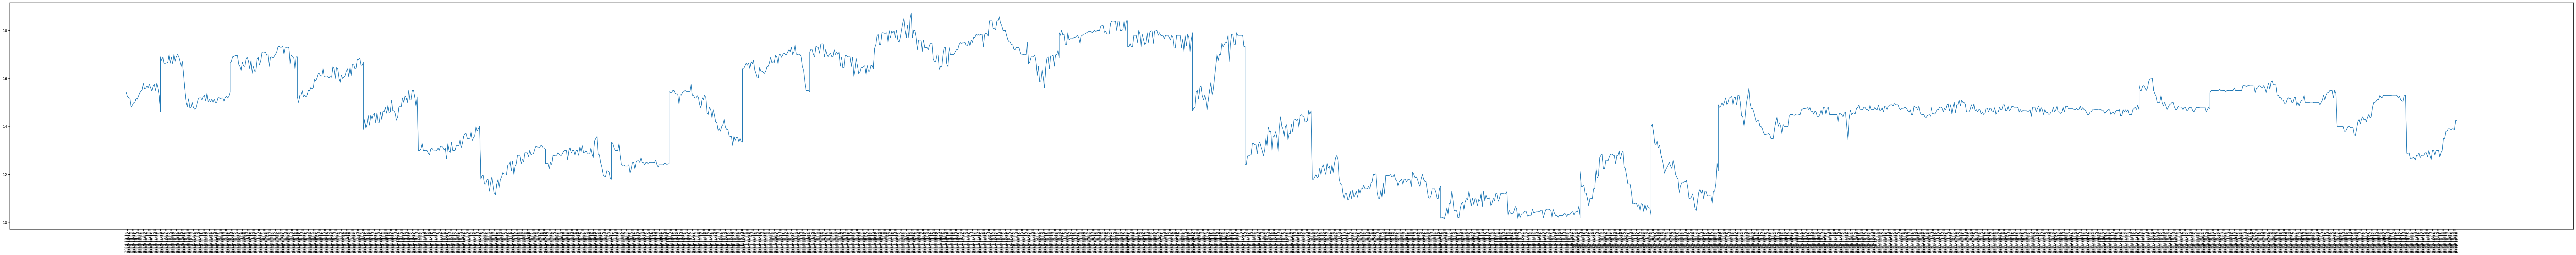

In [73]:
dates = df['Date'].tolist()
values = df['Open'].tolist()
values.reverse()
dates.sort()
plt.figure(figsize=(100,10))
plt.plot(dates,values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(dates)
plt.show()

R-squared value: 0.03751738225354784


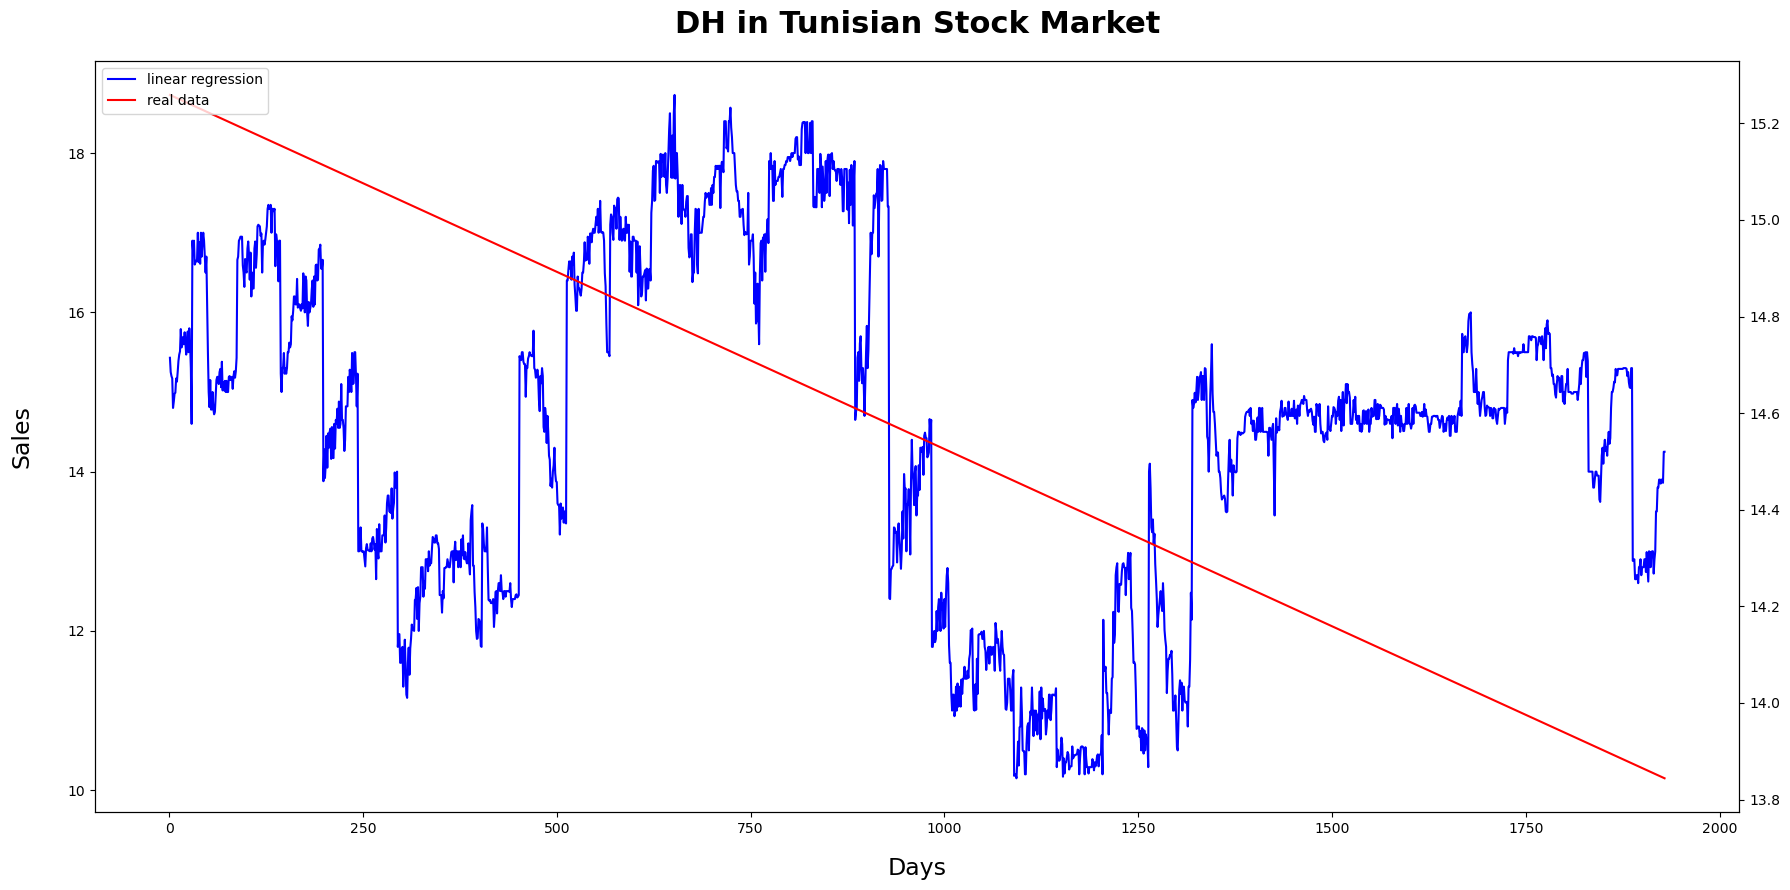

In [74]:
#x = np.arange(1,335,1).reshape(-1, 1)
y = values
x = np.arange(1,len(dates)+1,1).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

x2 = np.arange(1,len(dates)+1,1)
fig, ax1 = plt.subplots(figsize=(18,9))
ax1.plot(x2, y, color='blue',label='linear regression')
plt.xlabel("Days", fontsize = 17, labelpad = 15)
plt.ylabel("Sales", fontsize = 17, labelpad = 25)

ax2 = ax1.twinx()  # x ekseni ortak baska bir eksen olusturalim

color = 'blue'
ax2.plot(x2, model.predict(x), color='red',label='real data')
plt.title("DH in Tunisian Stock Market", fontsize =22, fontweight= "bold", pad=20)
# formatter = FuncFormatter(millions)
# ax1.yaxis.set_major_formatter(formatter)
fig.tight_layout()  # y etiketleri duzgun ciksin diye

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
# plt.savefig("linearregression.pdf")
plt.show()

In [75]:
len(x)
len(y)

1929

0.5445297123074226
           7             6             5             4            3
1.427e-16 x - 2.049e-13 x + 1.199e-10 x - 3.697e-08 x + 6.21e-06 x
              2
 - 0.0005026 x + 0.01459 x + 14.67


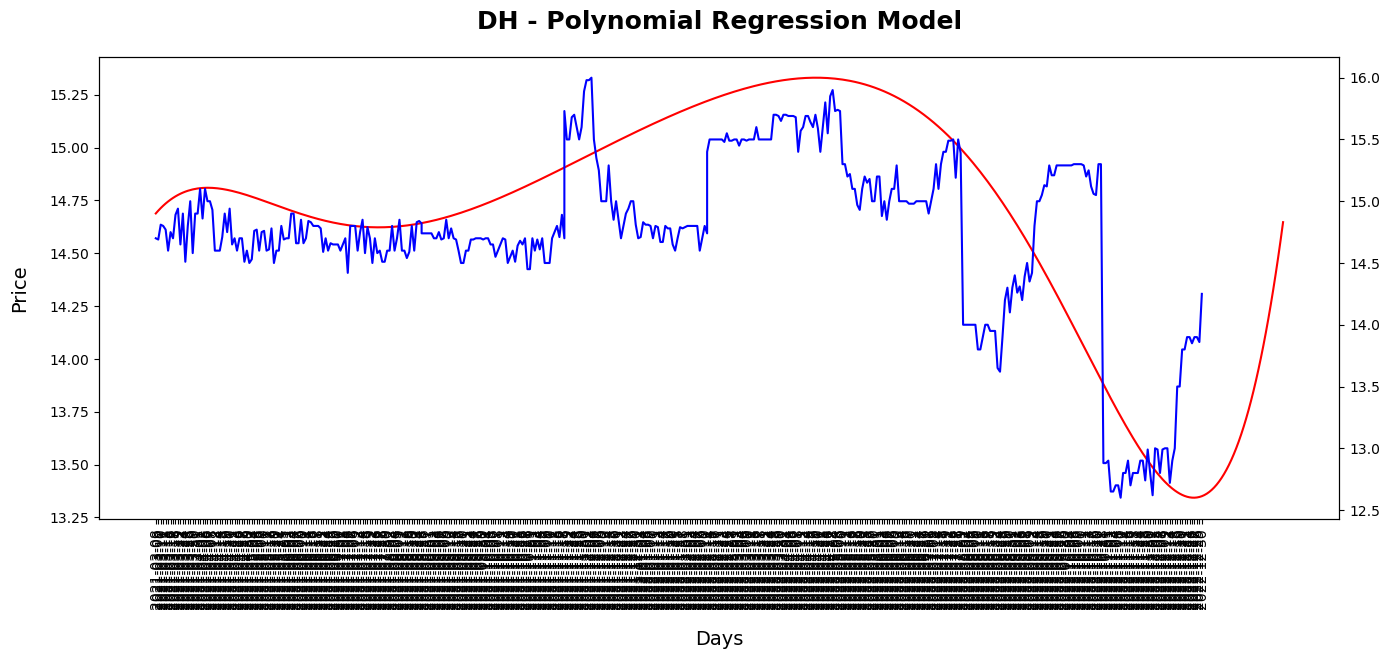

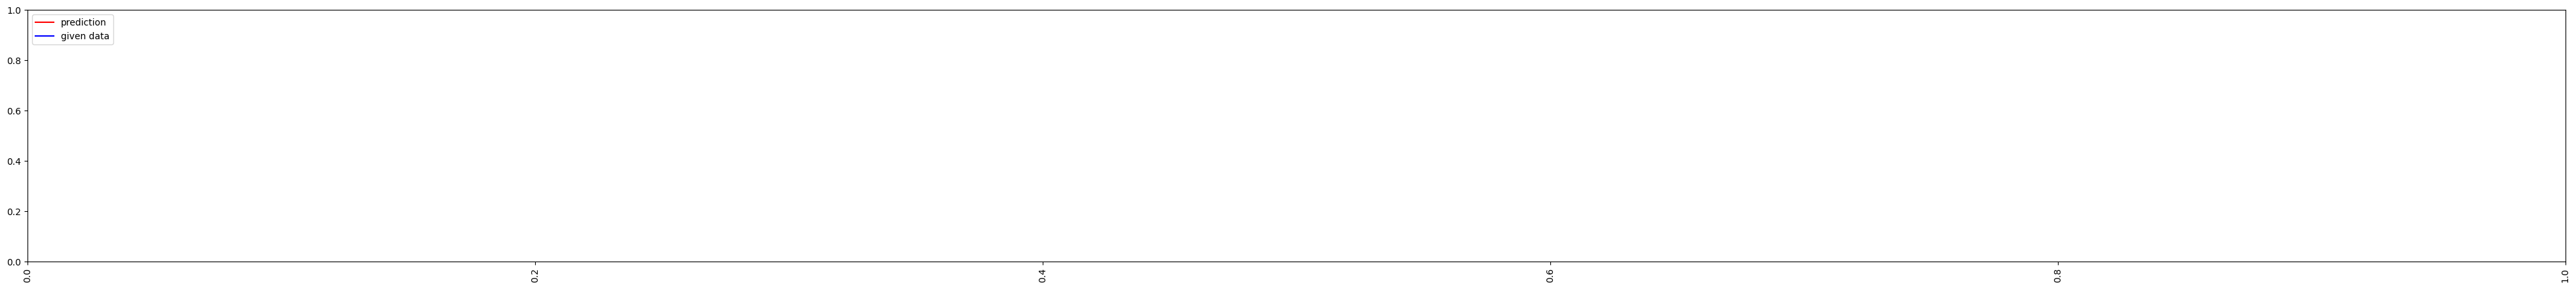

In [96]:
#this is a Polynomial Regression model. 

from sklearn.metrics import r2_score #added to avoid some little problems

y = df['Open'].tolist()[1:430]
y.reverse()
x = np.arange(1,430,1)
x2 = df['Date'].tolist()[1:430]
x2.sort()
# print(str(len(x)) + "as" + str(len(y)))

mymodel = np.poly1d(np.polyfit(x, y, 7))
print(r2_score(y, mymodel(x)))
print(mymodel)

fig, ax1 = plt.subplots(figsize=(16,6))
x1 = np.arange(1,460,1)
ax1.plot(mymodel(x1),color='red', label='prediction')
plt.title("DH - Polynomial Regression Model", fontsize =18, fontweight= "bold", pad=20)
plt.xlabel("Days", fontsize = 14, labelpad = 15)
plt.ylabel("Price",fontsize = 14, labelpad = 15)
plt.xticks(rotation=90)
plt.figure(figsize=(50,5))

ax2 = ax1.twinx()  # x ekseni ortak baska bir eksen olusturalim
ax2.plot(x2, y, color='blue', label='given data')
plt.xticks(rotation=90)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
# plt.savefig("polynomialregression.pdf")
plt.show()